In [20]:
import pandas as pd
import math

file_name = 'korea_exchang_bank.csv'

data_frame = pd.read_csv(file_name)[['Date','Close']]

data_frame['Date'] = pd.to_datetime(data_frame['Date'], errors='coerce')
data_frame['Close'] = pd.to_numeric(data_frame['Close'], errors='coerce')

data_frame.dropna(inplace=True)

data_frame.sort_values(by='Date', ascending=True, inplace=True)

data_frame

,Date,Close
2505,2003-01-23,14500.0
2504,2003-01-24,12350.0
2503,2003-01-27,10500.0
2502,2003-01-28,9700.0
2501,2003-01-29,8610.0
...,...,...
4,2012-12-25,40950.0
3,2012-12-26,41400.0
2,2012-12-27,42500.0
1,2012-12-28,42550.0


In [21]:
entropy_values = {}

In [22]:
def getEntropy(df, year):
    
    # Calculate Log_Returns
    close_values = df['Close'].tolist()

    Log_Returns = []

    for i in range (1, len(close_values)):
        LogReturn = math.log(close_values[i]) - math.log(close_values[i-1])
        Log_Returns.append(LogReturn)

    bin_no = 12

    # Calculate frequency of each bin
    min_val, max_val = min(Log_Returns), max(Log_Returns)

    frequency_array = [0] * bin_no

    L = min_val - 1

    for i in range (bin_no):
        R = min_val + (max_val - min_val) / bin_no * (i + 1)

        for log_return in Log_Returns:
            if L < log_return <= R: # Check if value is in interval (L, R]
                frequency_array[i] += 1

        L = R

    # Calculate probabilities
    probabilities = [0] * len(frequency_array)
    total_frequency = sum(frequency_array)

    for i in range (len(frequency_array)):
        probabilities[i] = frequency_array[i] / total_frequency

    # Calculate Shannon-Entropy
    Entropy = 0

    for i in range (len(probabilities)):
        if probabilities[i] != 0:
            Entropy += (probabilities[i] * math.log2(probabilities[i]))

    Entropy = -Entropy

    entropy_values[year] = Entropy

    print(f"Shannon Entropy of '{file_name[:-4]}' for year {year} is = {Entropy} bits")

In [23]:
for year in range(2003, 2013):
    df = data_frame[data_frame['Date'].dt.year == year]
    getEntropy(df, year)

Shannon Entropy of 'korea_investment_holding' for year 2003 is = 2.3474112221417096 bits
Shannon Entropy of 'korea_investment_holding' for year 2004 is = 2.581368233062565 bits
Shannon Entropy of 'korea_investment_holding' for year 2005 is = 2.76843931883986 bits
Shannon Entropy of 'korea_investment_holding' for year 2006 is = 2.4969442512311617 bits
Shannon Entropy of 'korea_investment_holding' for year 2007 is = 3.031145330637655 bits
Shannon Entropy of 'korea_investment_holding' for year 2008 is = 2.624650581641774 bits
Shannon Entropy of 'korea_investment_holding' for year 2009 is = 2.949195692446712 bits
Shannon Entropy of 'korea_investment_holding' for year 2010 is = 2.629199436204595 bits
Shannon Entropy of 'korea_investment_holding' for year 2011 is = 3.00956155162225 bits
Shannon Entropy of 'korea_investment_holding' for year 2012 is = 2.593788782859916 bits


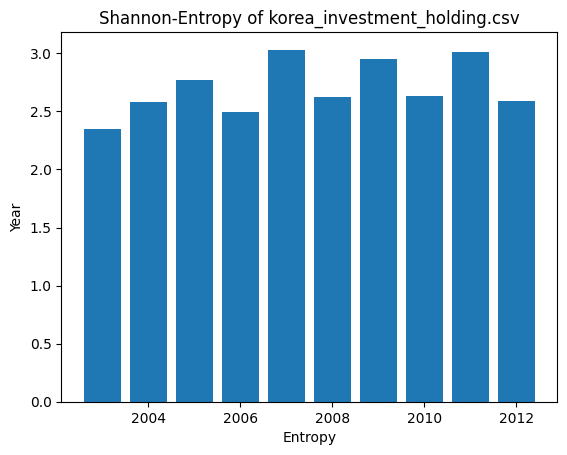

In [24]:
import matplotlib.pyplot as plt

plt.bar(entropy_values.keys(), entropy_values.values())
plt.xlabel('Entropy')
plt.ylabel('Year')
plt.title(f"Shannon-Entropy of {file_name}")
plt.show()